In [1]:
import numpy as np
import matplotlib.pyplot as plt
from WaveFunctions import plucked_string

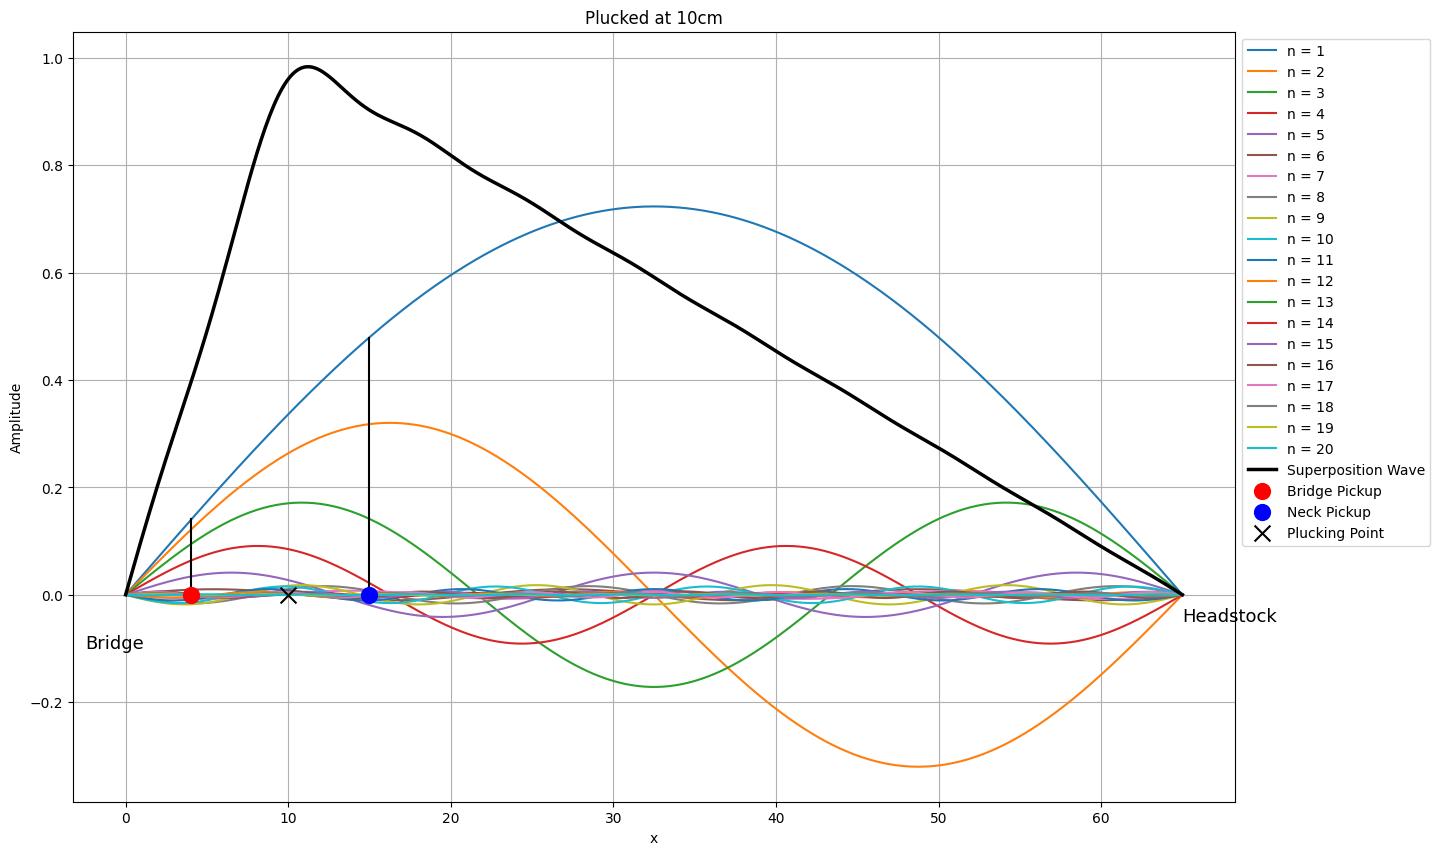

In [2]:
## Fourier representation of a plucked string, obtained from solving the wave equation 

L = 65 
c = 1
a = 1
p = 10 # Plucking Posn
x = np.linspace(0,65,500)  
t = 0

fig, ax = plt.subplots(1, figsize=(15, 10))

list = []
for i in range(1,21):  # Loop through modes
    u = plucked_string(x, t, L, p, c, a, i)
    if i == 1:
        a1 = u[31]
        a2 = u[115]
    list.append(u)
    ax.plot(x, u ,label = f'n = {i}') # Plot wave modes 
r = np.array(list, dtype = object)
ori = np.sum(r,axis = 0)

ax.plot(x,ori, label = "Superposition Wave", linewidth = 2.5, color = 'k') # Plot superposition 
ax.plot(([4,4]),([0,a1]),'k') #Bridge Pickup Line
ax.plot(([15,15]),([0,a2]),'k') #Neck Pickup Line
ax.set_xlabel('x')
ax.set_ylabel('Amplitude') 
ax.set_title(f'Plucked at {p}cm')   
ax.scatter(4,0,marker="o",color='r',s=130, zorder=2,label = 'Bridge Pickup') # Bridge Pick-up
ax.scatter(15,0,marker="o",color='b',s=130, zorder=2,label = 'Neck Pickup') # Neck pick-up
ax.scatter(p,0,marker="x",color='k',s=130, zorder=2,label = 'Plucking Point') # Bridge Pick-up
ax.text(-2.5,-0.1,'Bridge',fontsize=13)
ax.text(65,-0.05,'Headstock',fontsize=13)    
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()


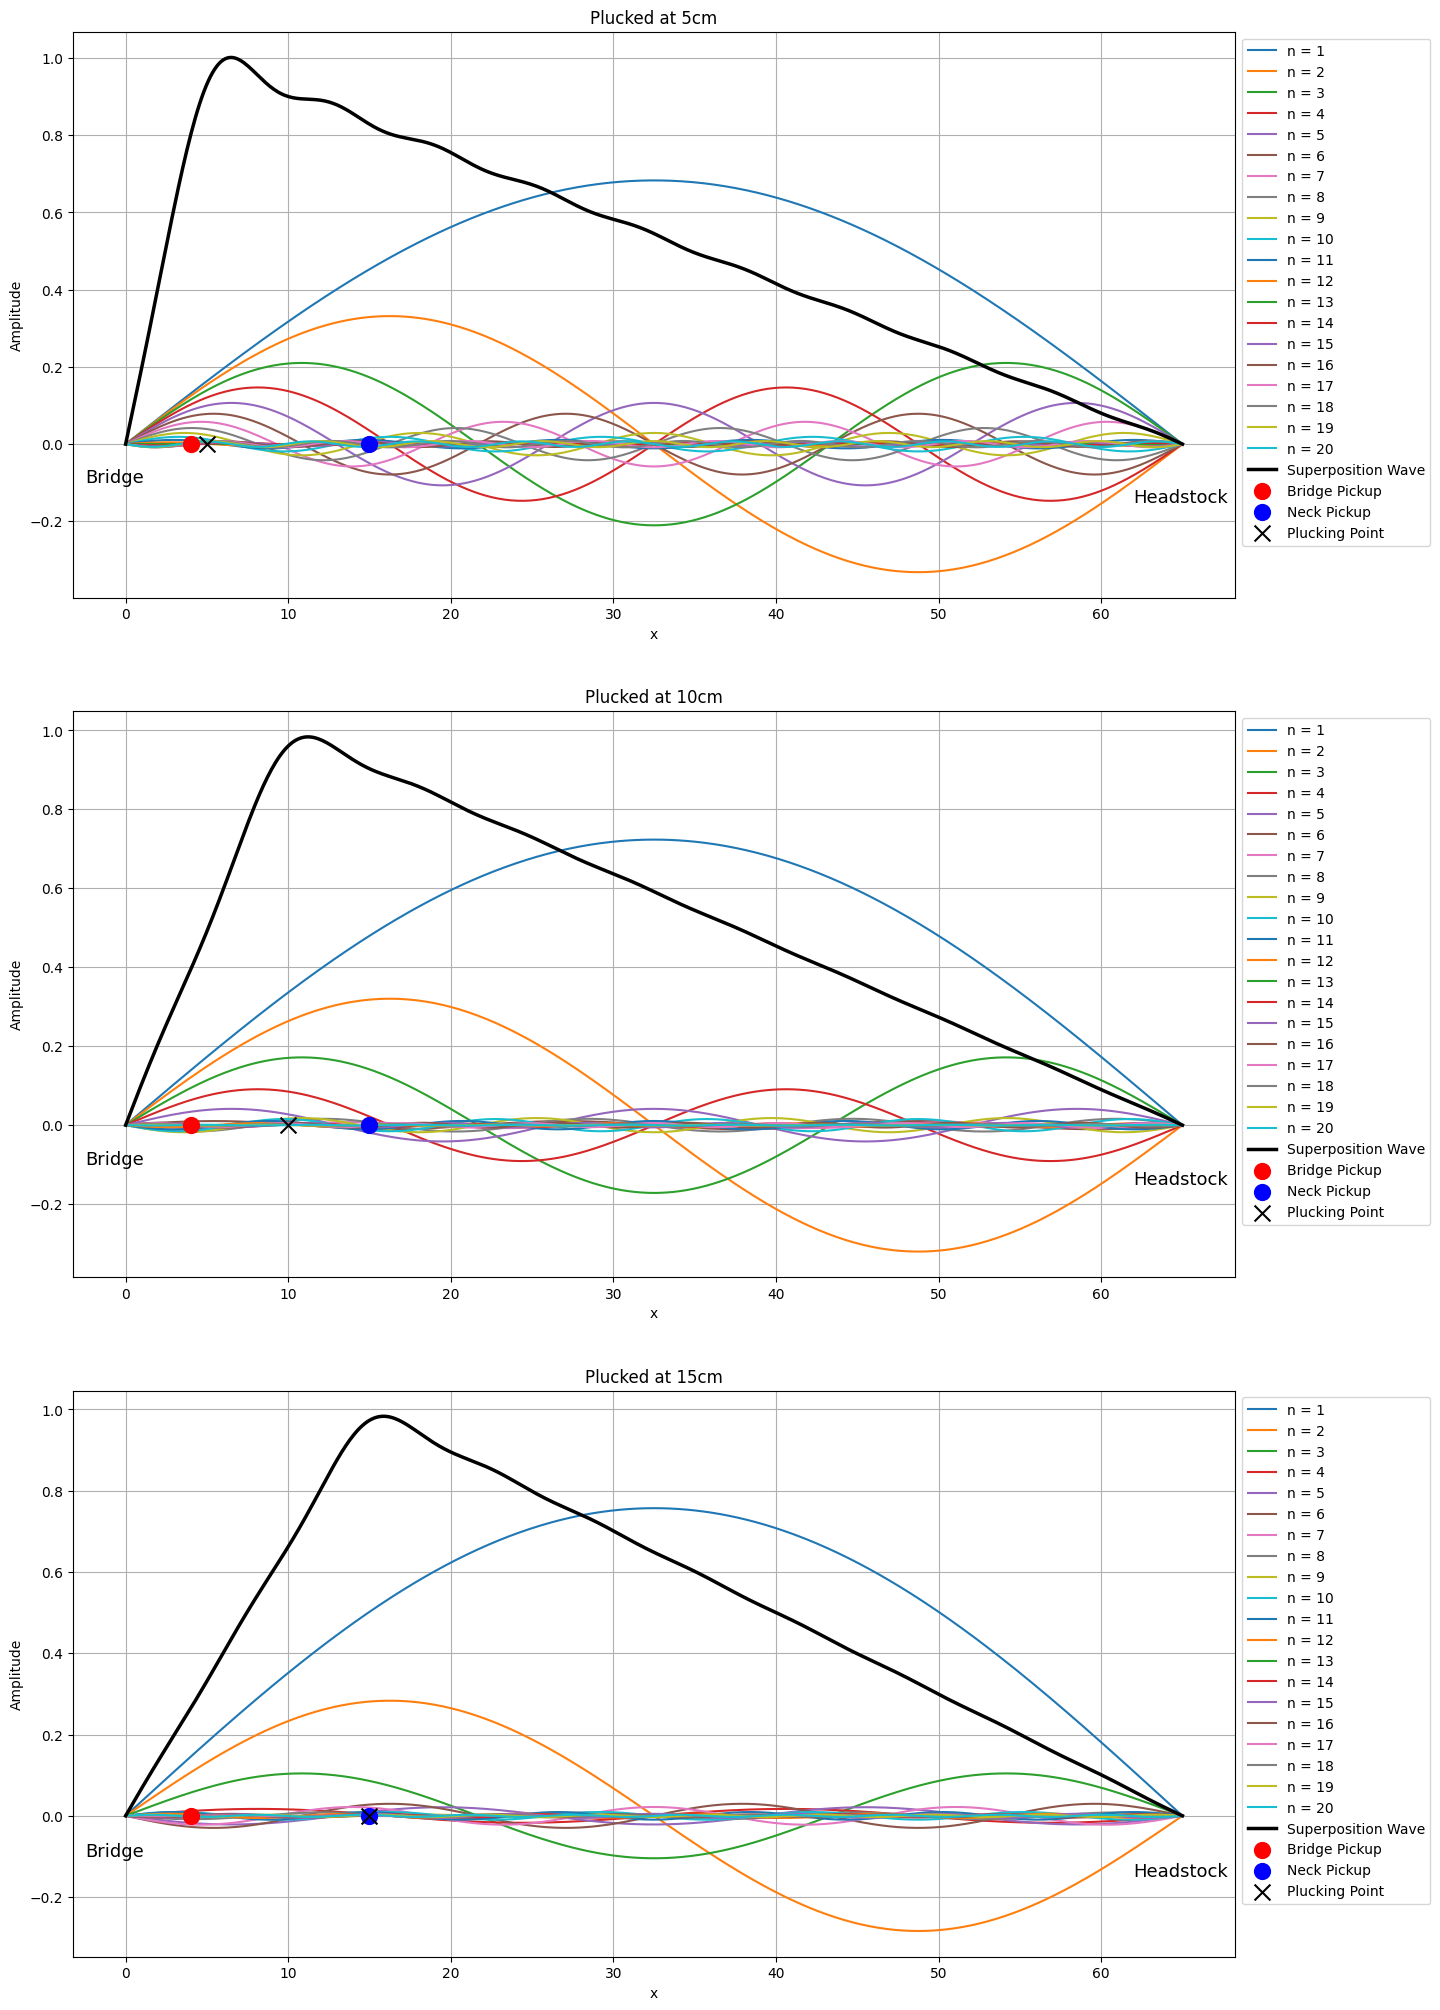

In [3]:
L = 65 
c = 10
a = 1
p = [5,10,15] # Plucking Posn
x = np.linspace(0,65,500)  
t = 0

fig, ax = plt.subplots(3,1, figsize=(15, 25))

for j in range(3):
    list = []
    for i in range(1,21):  # Loop through modes
        u = plucked_string(x, t, L, p[j], c, a, i)
        list.append(u)
        ax[j].plot(x, u , label = f'n = {i}') # Plot wave modes 
    r = np.array(list, dtype = object)
    ori = np.sum(r,axis = 0)

    ax[j].plot(x,ori, label = "Superposition Wave", linewidth = 2.5, color = 'k') # Plot superposition 
    ax[j].set_xlabel('x')
    ax[j].set_ylabel('Amplitude') 
    ax[j].set_title(f'Plucked at {p[j]}cm')   
    ax[j].scatter(4,0,marker="o",color='r',s=130, zorder=2,label = 'Bridge Pickup') # Bridge Pick-up
    ax[j].scatter(15,0,marker="o",color='b',s=130, zorder=2,label = 'Neck Pickup') # Neck pick-up
    ax[j].scatter(p[j],0,marker="x",color='k',s=130, zorder=2,label = 'Plucking Point') # Bridge Pick-up
    ax[j].text(-2.5,-0.1,'Bridge',fontsize=13)
    ax[j].text(62,-0.15,'Headstock',fontsize=13)    
    ax[j].legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax[j].grid()


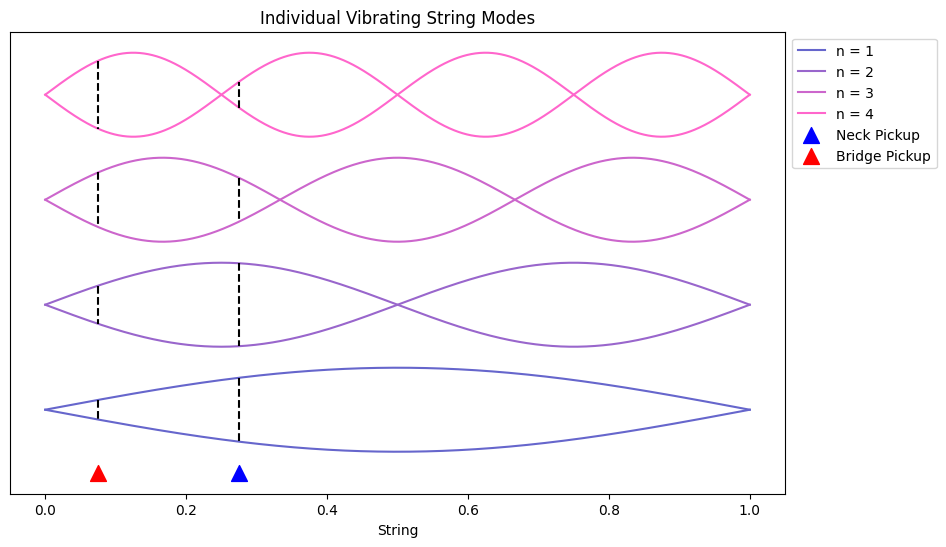

In [4]:
# Function to generate a vibrating string mode
def string_modes(x, mode, L):
    return np.sin(mode * np.pi * x / L)

### Parameters ###
# String Length 
L = 1  
# Number of modes
modes = 4  

# String Array 
x = np.linspace(0, L, 1000)

# Pickups
neckpickup = 0.275
bridgepickup = 0.075

fig,ax = plt.subplots(1,figsize=(10, 6))
ax.get_yaxis().set_visible(False)

for i in range(1, modes + 1):
    modes = string_modes(x, i, L)
    ax.plot(x, modes + 5/2*i, label=f'n = {i}', color=(0.2 + i/5, 0.4, 0.8)) 
    ax.plot(x, -modes +5/2*i,color=(0.2 + i/5, 0.4, 0.8))
    a1 = np.sin(i* np.pi*neckpickup)
    b1 = np.sin(i* np.pi*bridgepickup)
    ax.plot(([neckpickup,neckpickup]),([a1 + 5/2*i,-a1 + 5/2*i]),'k',linestyle = '--') # Neck Pickup Line
    ax.plot(([bridgepickup,bridgepickup]),([b1 + 5/2*i,-b1 + 5/2*i]),'k',linestyle = '--') # Bidge Pickup Line

ax.scatter(neckpickup,1,marker="^",color='b',s=130, zorder=2,label = 'Neck Pickup') # Neck pick-up
ax.scatter(bridgepickup,1,marker="^",color='r',s=130, zorder=2,label = 'Bridge Pickup') # Neck pick-up
ax.set_title('Individual Vibrating String Modes')
ax.set_xlabel('String')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
